In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample

# 데이터 로드
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
# 데이터 전처리
data.drop(columns=["Unnamed: 32", "id"], inplace=True) # 불필요한 열 제거
data["diagnosis"] = data["diagnosis"].map({"M": 1, "B": 0}) # 레이블 변환:범주형데이터를 수치형으로 변환("M"(악성): 1, "B"(양성): 0)

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

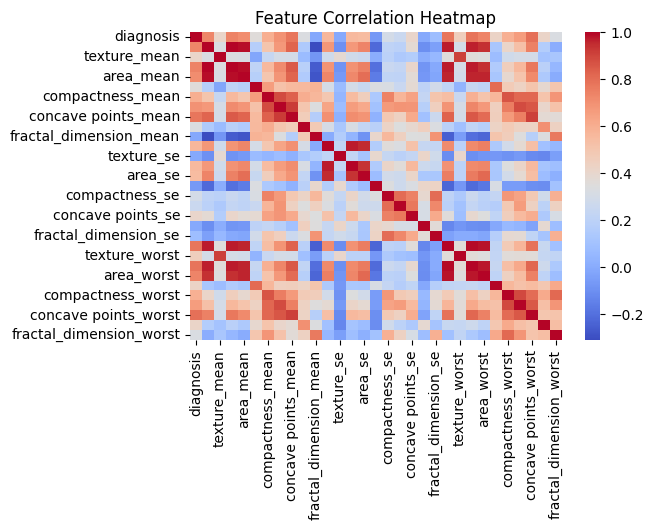

In [3]:
# 데이터 탐색 (EDA)
print(data.describe())
print(data["diagnosis"].value_counts(normalize=True))

# 상관관계 히트맵
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [4]:
# 독립 변수와 종속 변수 분리
X = data.drop(columns=["diagnosis"]) #독립 변수 :diagnosis" 열을 제외한 나머지 열
y = data["diagnosis"] #종속 변수: "diagnosis" 열, 모델이 예측하고자 하는 목표 변수

# 데이터 정규화 및 분할
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
# 로지스틱 회귀 모델 학습 및 평가
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
initial_accuracy = accuracy_score(y_test, y_pred)
print(f"Initial Test Accuracy: {initial_accuracy * 100:.2f}%")

Initial Test Accuracy: 98.25%


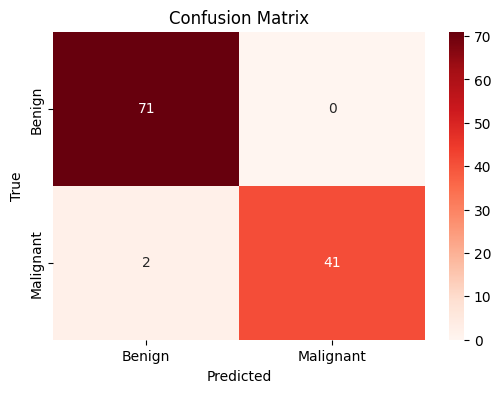

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [6]:
# 혼동 행렬 및 분류 보고서 출력
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_pred))

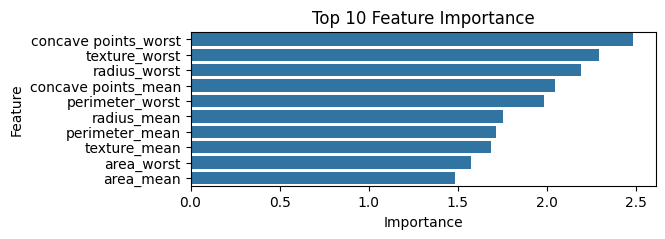

In [7]:
# 특성 중요도 시각화 (해당 특성이 종속 변수에 미치는 영향)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
plt.figure(figsize=(6, 2))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance')
plt.show()

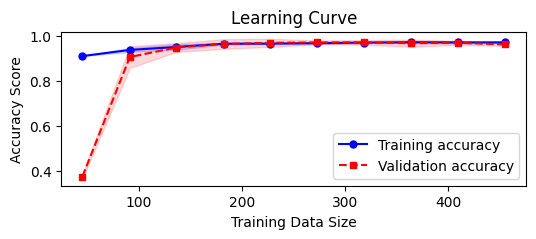

Cross-Validation Accuracy: 97.01% ± 0.91%


In [8]:
# 학습 곡선 및 교차 검증 (K-Fold Cross Validation)
train_sizes, train_scores, test_scores = learning_curve(model, X_scaled, y, cv=5, n_jobs=-1,
                                                         train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(6, 2))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='red', linestyle='--', marker='s', markersize=5,
         label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15,
                 color='red')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='lower right')
plt.show()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X_scaled, y, cv=kf)

print(f"Cross-Validation Accuracy: {cross_val_scores.mean() * 100:.2f}% ± {cross_val_scores.std() * 100:.2f}%")

In [9]:
# 부트스트래핑(Bootstrapping) 정확도 계산
n_iterations = 1000
bootstrap_accuracies = []

for _ in range(n_iterations):
    X_resampled, y_resampled = resample(X_train, y_train)
    model.fit(X_resampled, y_resampled)
    y_pred_bootstrap = model.predict(X_test)
    bootstrap_accuracies.append(accuracy_score(y_test, y_pred_bootstrap))

bootstrap_mean = np.mean(bootstrap_accuracies)
bootstrap_ci_lower = np.percentile(bootstrap_accuracies, 2.5)
bootstrap_ci_upper = np.percentile(bootstrap_accuracies, 97.5)

print(f"Bootstrapping Accuracy: {bootstrap_mean * 100:.2f}%")
print(f"Confidence Interval: [{bootstrap_ci_lower * 100:.2f}%, {bootstrap_ci_upper * 100:.2f}%]")

Bootstrapping Accuracy: 97.29%
Confidence Interval: [95.61%, 98.25%]


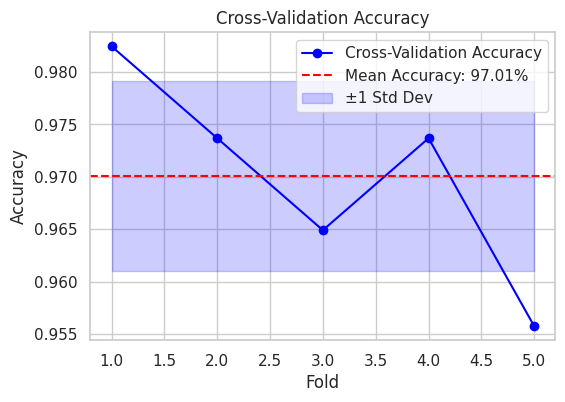

In [10]:
# Seaborn 스타일 설정
sns.set(style="whitegrid")

# K-폴드 교차 검증 정확도 시각화
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(cross_val_scores) + 1), cross_val_scores, marker='o', linestyle='-', color='blue', label='Cross-Validation Accuracy')
plt.axhline(y=cross_val_scores.mean(), color='red', linestyle='--', label=f'Mean Accuracy: {cross_val_scores.mean() * 100:.2f}%')
plt.fill_between(range(1, len(cross_val_scores) + 1),
                 cross_val_scores.mean() - cross_val_scores.std(),
                 cross_val_scores.mean() + cross_val_scores.std(),
                 color='blue', alpha=0.2, label='±1 Std Dev')
plt.title('Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

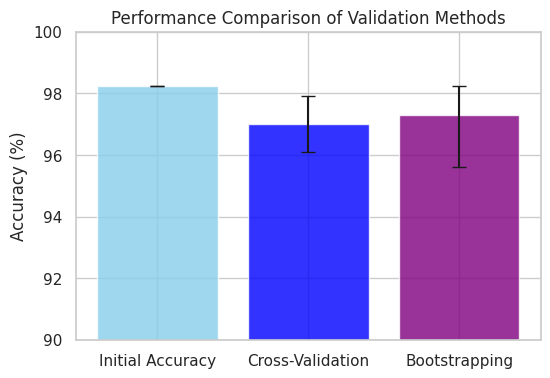

In [11]:
# 성능 비교 시각화
methods = ['Initial Accuracy', 'Cross-Validation', 'Bootstrapping']
accuracies = [initial_accuracy * 100,
              cross_val_scores.mean() * 100,
              bootstrap_mean * 100]

yerr = [
    [0, cross_val_scores.std() * 100,
     accuracies[2] - bootstrap_ci_lower * 100],
    [0,
     cross_val_scores.std() * 100,
     bootstrap_ci_upper * 100 - accuracies[2]]
]
# 막대 그래프 생성
plt.figure(figsize=(6, 4))
plt.bar(methods,
        accuracies,
        yerr=np.abs(yerr),
        capsize=5,
        color=['skyblue', 'blue', 'purple'],
        alpha=0.8)
plt.title('Performance Comparison of Validation Methods')
plt.ylabel('Accuracy (%)')
plt.ylim(90, 100)
plt.show()